In [1]:
import pandas as pd
import numpy as np 
import math as mt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df_iris = pd.read_csv('iris.csv')

In [3]:
X = df_iris.drop('species', axis=1)
y = df_iris['species']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

* Creamos el conjunto de entrenamiento y prueba.

In [5]:
# Convertir de nuevo a DataFrame
train_df = pd.DataFrame(X_train)
train_df['class'] = y_train

In [6]:
# Convertir de nuevo a DataFrame
test_df = pd.DataFrame(X_test)
test_df['class'] = y_test

* Creamos los conjuntos de datos para cada una de las clases co el conjunto de entrenamiento

In [7]:
# Función para modificar las etiquetas
def modify_labels(df, positive_class):
    df_copy = df.copy()
    df_copy['class'] = df_copy['class'].apply(lambda x: positive_class if x == positive_class else 'No-' + positive_class)
    return df_copy

* Aplicamos la función y creamos los tres conjuntos de datos para cada especie o clase.

In [8]:
# Crear conjuntos modificados para cada clase
train_setosa = modify_labels(train_df, 'Iris-setosa')
train_versicolor = modify_labels(train_df, 'Iris-versicolor')
train_virginica = modify_labels(train_df, 'Iris-virginica')

* Creamos la función para calcular la norma de un vector.

In [9]:
def norma(vector: list) -> float:
    sumV = 0
    res = 0
    for i in range(len(vector)):
        sumV = sumV + pow(vector[i],2)
    res = mt.sqrt(sumV)
    return res

In [10]:
def dict_to_list_norm(diccionario: dict) -> list:
    # Función principal que recibe el diccionario y procesa cada lista
    normas = []
    for key in diccionario:
        result = norma(diccionario[key])
        normas.append(result)
    return normas


* Creamos la funcion SVM.

In [11]:
def SVM(df_class_train: pd.DataFrame, col_etiq_name: str ,positive_class: str):
    print("Etapa de entrenamiento")
    print('\t')

    #Numero de instancias totales que cumplan con la clase especificada.
    M, N = df_class_train[col_etiq_name].value_counts()
    

    #Obtendremos las caracteristicas de cada una de las clases para poder calcular los vectores promedio
    
    #Obtener los nombres de las clases
    clases = df_class_train[col_etiq_name].unique()

    # Crear un diccionario para almacenar las listas por clase
    listas_por_clase = {clase: {} for clase in clases}

    # Recorrer cada columna excepto la columna de clase
    for col in train_setosa.columns[:-1]:
        for clase in clases:
            # Filtrar las filas que corresponden a la clase actual y convertir la columna en una lista
            listas_por_clase[clase][col] = df_class_train[df_class_train[col_etiq_name] == clase][col].tolist()

    # Crear un diccionario para almacenar los resultados promedio
    promedios = {}

    # Iterar sobre las claves del diccionario listas_por_clase
    for key in listas_por_clase:
        # Crear una lista vacía para almacenar los promedios por cada clase
        promedios[key] = []
        # Iterar sobre las listas de cada clase
        for subkey in listas_por_clase[key]:
            # Obtener la lista actual
            current_list = listas_por_clase[key][subkey]
            # Calcular la suma de los elementos de la lista
            total_sum = sum(current_list)
            # Calcular la longitud de la lista
            list_length = len(current_list)
            # Calcular el promedio y almacenarlo en la lista de promedios
            if list_length > 0:
                promedio = total_sum / list_length
            else:
                promedio = 0  # Manejo de caso donde la lista está vacía
            promedios[key].append(promedio)


    # Inicializar una lista para almacenar las sumas acumuladas
    accumulated_sums = []

    # Iterar sobre las posiciones de los elementos en las listas
    for index in range(len(promedios[positive_class])):
        sum_at_position = 0
        # Iterar sobre las claves del diccionario y sumar el elemento en la posición actual
        for key in promedios:
            sum_at_position += promedios[key][index]
        # Añadir la suma acumulada a la lista de resultados
        accumulated_sums.append(sum_at_position)


    num_keys = len(promedios)
    vec_prom = []

    for i in range(len(accumulated_sums)):
        vec_prom.append(accumulated_sums[i]/num_keys)



    print(f'Numero de instancias de la clase Positiva: {N}')
    print('\t')
    # Iterar sobre las claves del diccionario e imprimir cada lista
    for key in promedios:
        print(f"Vector de '{key}': {promedios[key]}")
        print('\t')

    print(f'Vector promedio entre las clases: {vec_prom}')
    print('\t')

    norma_classYES_NO = dict_to_list_norm(promedios)
    norma_prom = norma(vec_prom)

    print(promedios)
    print(f'Norma del vector promedio de la clase No-Positiva: {norma_classYES_NO[0]}')
    print(f'Norma del vector promedio de la clase Positiva: {norma_classYES_NO[1]}')
    print(f'Norma del vector promedio de las dos clases: {norma_prom}')

    return N, norma_classYES_NO, norma_prom, vec_prom


* Aplicamos la funcion a los tres conjuntos de datos creados por cada clase. 

In [12]:
setosa_ins, list_norms_set, norm_prom_setosa, setosa_vec = SVM(train_setosa, "class", "Iris-setosa")

Etapa de entrenamiento
	
Numero de instancias de la clase Positiva: 39
	
Vector de 'No-Iris-setosa': [6.295061728395061, 2.885185185185185, 4.949382716049382, 1.7086419753086421]
	
Vector de 'Iris-setosa': [5.02051282051282, 3.4025641025641025, 1.4615384615384615, 0.23846153846153847]
	
Vector promedio entre las clases: [5.657787274453941, 3.1438746438746437, 3.205460588793922, 0.9735517568850903]
	
{'No-Iris-setosa': [6.295061728395061, 2.885185185185185, 4.949382716049382, 1.7086419753086421], 'Iris-setosa': [5.02051282051282, 3.4025641025641025, 1.4615384615384615, 0.23846153846153847]}
Norma del vector promedio de la clase No-Positiva: 8.681471210965988
Norma del vector promedio de la clase Positiva: 6.2430721630358486
Norma del vector promedio de las dos clases: 7.288160620418297


In [13]:
versi_ins, list_norms_versi, norm_prom_versi, versi_prom = SVM(train_versicolor, "class", "Iris-versicolor")

Etapa de entrenamiento
	
Numero de instancias de la clase Positiva: 37
	
Vector de 'No-Iris-versicolor': [5.878313253012048, 3.183132530120482, 3.637349397590361, 1.189156626506024]
	
Vector de 'Iris-versicolor': [5.886486486486487, 2.7621621621621624, 4.216216216216216, 1.3243243243243243]
	
Vector promedio entre las clases: [5.882399869749268, 2.972647346141322, 3.9267828069032884, 1.256740475415174]
	
{'No-Iris-versicolor': [5.878313253012048, 3.183132530120482, 3.637349397590361, 1.189156626506024], 'Iris-versicolor': [5.886486486486487, 2.7621621621621624, 4.216216216216216, 1.3243243243243243]}
Norma del vector promedio de la clase No-Positiva: 7.702681580291532
Norma del vector promedio de la clase Positiva: 7.8619703041635844
Norma del vector promedio de las dos clases: 7.774206088552404


In [14]:
virgi_ins, list_norms_virgi, norm_prom_virgi, virgi_prom = SVM(train_virginica, "class", "Iris-virginica")

Etapa de entrenamiento
	
Numero de instancias de la clase Positiva: 44
	
Vector de 'Iris-virginica': [6.638636363636365, 2.9886363636363638, 5.565909090909091, 2.0318181818181817]
	
Vector de 'No-Iris-virginica': [5.442105263157895, 3.0907894736842105, 2.8026315789473686, 0.7671052631578948]
	
Vector promedio entre las clases: [6.04037081339713, 3.039712918660287, 4.18427033492823, 1.3994617224880384]
	
{'Iris-virginica': [6.638636363636365, 2.9886363636363638, 5.565909090909091, 2.0318181818181817], 'No-Iris-virginica': [5.442105263157895, 3.0907894736842105, 2.8026315789473686, 0.7671052631578948]}
Norma del vector promedio de la clase No-Positiva: 9.386749661883822
Norma del vector promedio de la clase Positiva: 6.9001944550864325
Norma del vector promedio de las dos clases: 8.074190085679167


* Clasificacion de las instancias con SVM.

In [25]:
def class_SVM(test_df: pd.DataFrame, vec_prom: list, norma_vec_prom: float, list_norms_class: list, etiqueta: str) -> list:
    # Si la columna 'class' no existe, no la eliminamos
    if 'class' in test_df.columns:
        features_list = test_df.drop('class', axis=1).values.tolist()
    else:
        features_list = test_df.values.tolist()

    pre_proy = []
    proyecciones = []
    predicciones = []

    # Calculamos las proyecciones
    for features in features_list:
        suma = sum(f * v for f, v in zip(features, vec_prom))
        pre_proy.append(suma)
    
    for pre in pre_proy:
        proy = pre / norma_vec_prom
        proyecciones.append(proy)
        if etiqueta == 'Virginica':
            if list_norms_class[0] > list_norms_class[1]:
                predicciones.append(0 if proy < norma_vec_prom else 1)
            else:
                predicciones.append(1 if proy < norma_vec_prom else 0)
        else:  # Para 'Setosa' o 'Versicolor'
            if list_norms_class[1] > list_norms_class[0]:
                predicciones.append(0 if proy < norma_vec_prom else 1)
            else:
                predicciones.append(1 if proy < norma_vec_prom else 0)

    # Imprimir proyecciones y predicciones
    for pos, (proy, pred) in enumerate(zip(proyecciones, predicciones)):
        print(f'La proyección de la instancia {pos+1} respecto al vector promedio de la clase {etiqueta}: {proy}')
        print(f'La predicción de la instancia {pos+1} es: {pred}')

    return predicciones

In [26]:
test_setosa = class_SVM(X_test, setosa_vec, norm_prom_setosa, list_norms_set, 'Setosa')

La proyección de la instancia 1 respecto al vector promedio de la clase Setosa: 8.274020230168045
La predicción de la instancia 1 es: 0
La proyección de la instancia 2 respecto al vector promedio de la clase Setosa: 7.499648377970512
La predicción de la instancia 2 es: 0
La proyección de la instancia 3 respecto al vector promedio de la clase Setosa: 6.723844498180959
La predicción de la instancia 3 es: 1
La proyección de la instancia 4 respecto al vector promedio de la clase Setosa: 9.929237596631308
La predicción de la instancia 4 es: 0
La proyección de la instancia 5 respecto al vector promedio de la clase Setosa: 6.034583166676581
La predicción de la instancia 5 es: 1
La proyección de la instancia 6 respecto al vector promedio de la clase Setosa: 9.287046842683013
La predicción de la instancia 6 es: 0
La proyección de la instancia 7 respecto al vector promedio de la clase Setosa: 6.003114392917634
La predicción de la instancia 7 es: 1
La proyección de la instancia 8 respecto al vect

In [27]:
test_versi = class_SVM(X_test, versi_prom, norm_prom_versi, list_norms_versi,'Versicolor')

La proyección de la instancia 1 respecto al vector promedio de la clase Versicolor: 8.423252551327478
La predicción de la instancia 1 es: 1
La proyección de la instancia 2 respecto al vector promedio de la clase Versicolor: 7.563228246497816
La predicción de la instancia 2 es: 0
La proyección de la instancia 3 respecto al vector promedio de la clase Versicolor: 6.507051856607232
La predicción de la instancia 3 es: 0
La proyección de la instancia 4 respecto al vector promedio de la clase Versicolor: 10.105605639642409
La predicción de la instancia 4 es: 1
La proyección de la instancia 5 respecto al vector promedio de la clase Versicolor: 5.873335760715216
La predicción de la instancia 5 es: 0
La proyección de la instancia 6 respecto al vector promedio de la clase Versicolor: 9.463526257681673
La predicción de la instancia 6 es: 1
La proyección de la instancia 7 respecto al vector promedio de la clase Versicolor: 5.826717781323254
La predicción de la instancia 7 es: 0
La proyección de la

In [28]:
test_virgi = class_SVM(X_test, virgi_prom, norm_prom_virgi, list_norms_virgi, 'Virginica')

La proyección de la instancia 1 respecto al vector promedio de la clase Virginica: 8.452096496105348
La predicción de la instancia 1 es: 1
La proyección de la instancia 2 respecto al vector promedio de la clase Virginica: 7.563128402432174
La predicción de la instancia 2 es: 0
La proyección de la instancia 3 respecto al vector promedio de la clase Virginica: 6.45596697530188
La predicción de la instancia 3 es: 0
La proyección de la instancia 4 respecto al vector promedio de la clase Virginica: 10.12978487557621
La predicción de la instancia 4 es: 1
La proyección de la instancia 5 respecto al vector promedio de la clase Virginica: 5.832557239499186
La predicción de la instancia 5 es: 0
La proyección de la instancia 6 respecto al vector promedio de la clase Virginica: 9.49812479740741
La predicción de la instancia 6 es: 1
La proyección de la instancia 7 respecto al vector promedio de la clase Virginica: 5.783891478760194
La predicción de la instancia 7 es: 0
La proyección de la instancia

In [29]:
def class_final(predicciones_setosa: list, predicciones_versi: list, predicciones_virgi: list, no_train_set: int, no_train_versi: int, no_train_virgi: int, train_values: int) -> list:
    prob_set = []
    prob_versi = []
    prob_virgi = []
    y_pred = []

    for i in range(len(predicciones_setosa)):
        res1 = predicciones_setosa[i] * (no_train_set/train_values)
        prob_set.append(res1)
        res2 = predicciones_versi[i] * (no_train_versi/train_values)
        prob_versi.append(res2)
        res3 = predicciones_virgi[i] * (no_train_virgi/train_values)
        prob_virgi.append(res3)

    # Clasificar cada instancia según las condiciones dadas
    for j in range(len(prob_set)):
        P1i = prob_set[j]
        P2i = prob_versi[j]
        P3i = prob_virgi[j]

        if (P1i == P2i and P1i == P3i and P2i == P3i):
            y_pred.append('Indefinida')
        else:
            max_prob = max(P1i, P2i, P3i)
            if (max_prob == P1i):
                y_pred.append('Iris-setosa')
            elif (max_prob == P2i):
                y_pred.append('Iris-versicolor')
            elif (max_prob == P3i):
                y_pred.append('Iris-virginica')
    
    print(f'Probabilidades de pertenencia')
    for vals in range(len(prob_set)):
        print(f'La probabilidad de pertenencia de la instancia {vals+1} a la clase Setosa es: {prob_set[vals]}')
        print(f'La probabilidad de pertenencia de la instancia {vals+1} a la clase Versicolor es: {prob_versi[vals]}')
        print(f'La probabilidad de pertenencia de la instancia {vals+1} a la clase Virginca es: {prob_virgi[vals]}')

    print('\t')
    print('Clasificaciones finales de las instancias')
    for fin in range(len(y_pred)):
        print(f'La clasificación final de la instancia {fin+1} es: {y_pred[fin]}')

    return y_pred

In [30]:
conteo = train_setosa['class'].value_counts()['Iris-setosa']
print(conteo)
conteo2 = train_versicolor['class'].value_counts()['Iris-versicolor']
print(conteo2)
conteo3 = train_virginica['class'].value_counts()['Iris-virginica']
print(conteo3)
tam_df = num_filas = X_train.shape[0]
print(tam_df)

39
37
44
120


In [31]:
y_pred = class_final(test_setosa, test_versi, test_virgi, conteo, conteo2, conteo3, tam_df)

Probabilidades de pertenencia
La probabilidad de pertenencia de la instancia 1 a la clase Setosa es: 0.0
La probabilidad de pertenencia de la instancia 1 a la clase Versicolor es: 0.30833333333333335
La probabilidad de pertenencia de la instancia 1 a la clase Virginca es: 0.36666666666666664
La probabilidad de pertenencia de la instancia 2 a la clase Setosa es: 0.0
La probabilidad de pertenencia de la instancia 2 a la clase Versicolor es: 0.0
La probabilidad de pertenencia de la instancia 2 a la clase Virginca es: 0.0
La probabilidad de pertenencia de la instancia 3 a la clase Setosa es: 0.325
La probabilidad de pertenencia de la instancia 3 a la clase Versicolor es: 0.0
La probabilidad de pertenencia de la instancia 3 a la clase Virginca es: 0.0
La probabilidad de pertenencia de la instancia 4 a la clase Setosa es: 0.0
La probabilidad de pertenencia de la instancia 4 a la clase Versicolor es: 0.30833333333333335
La probabilidad de pertenencia de la instancia 4 a la clase Virginca es: 

In [32]:
y_pred

['Iris-virginica',
 'Indefinida',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Indefinida',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa']

In [33]:
reporte = classification_report(y_test, y_pred)
print(f'{reporte}')

                 precision    recall  f1-score   support

     Indefinida       0.00      0.00      0.00         0
    Iris-setosa       0.92      1.00      0.96        11
Iris-versicolor       1.00      0.15      0.27        13
 Iris-virginica       0.43      1.00      0.60         6

       accuracy                           0.63        30
      macro avg       0.59      0.54      0.46        30
   weighted avg       0.86      0.63      0.59        30



c:\Users\dern9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dern9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dern9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

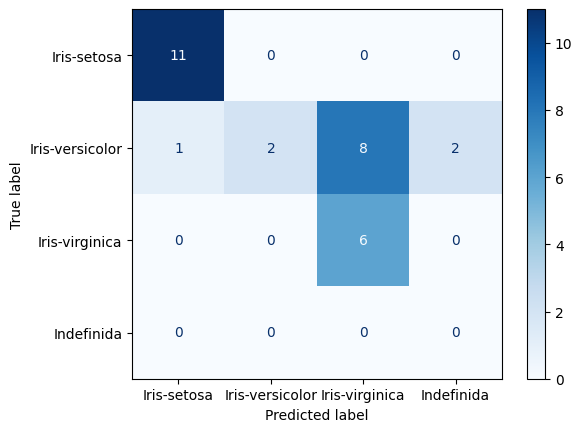

In [ ]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Indefinida'])

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Indefinida'])
disp.plot(cmap=plt.cm.Blues)
plt.show()